In [1]:
#fixing custom kernel autocompleate issue
%config Completer.use_jedi = False

# how to install trunamia
1. verify that you are using python 3.6, idealy 3.6.7
2. `git clone https://github.com/RealImpactAnalytics/trumania.git`
3. `cd trunamia`
4. `python3.6 -m pip install pipenv`
5. get your python executable location with `python3.6 -c "import sys; print(sys.executable)`
6. `python3.6 -m pipenv install --three --python {full path to your python3.6 executable}`
7. `python3.6 -m pipenv shell`
8. `python3.6 -m pip install pykernel`
9. `python3.6 -m ipykernel install --user --name trunamia --display-name "Python trunamia 3.6.9"`
10. reload your jupyter-notebook webpage and change the kernel to `python trunamia 3.6.9`
11. realise you dont actually need trunamia
12.

# note
> This text was written after several hours of pain and suffering. 
> My system config is ubuntu 20.4 remote web server of jupyter-notebook.
> Your experience may wary

In [2]:
from trumania.core import circus

# About the dataset

I have a dog who sheds a lot (constantly!), so I had the idea of generating a dataset of records of several dogs (n=20?) over several years.

In [3]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.random.seed = 42

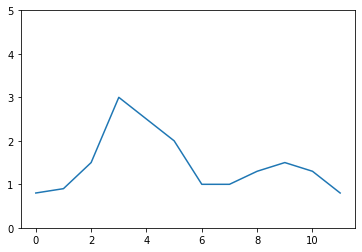

In [5]:
class MonthlyHairLossCoef:
    coefs = {
        1: 0.8,
        2: 0.9,
        3: 1.5,
        4: 3.0,
        5: 2.5,
        6: 2.0,
        7: 1.0,
        8: 1.0,
        9: 1.3,
        10: 1.5,
        11: 1.3,
        12: 0.8
    }
    
    @classmethod
    def plot(cls):
        plt.plot(cls.coefs.values())
        plt.ylim(0, 5)
    
    @classmethod
    def __getitem__(cls, num):
        return cls.coefs[num]
        
MonthlyHairLossCoef.plot()

In [6]:
class Dog:
    count = 0
    
    def __init__(self):
        self.id = Dog.count
        self.increment_total_count(1)
        self.height = np.random.randint(low=50, high=100) / 100 # cm to m
        self.weight = np.random.randint(low=10, high=30) #kg
        self.hair_dencity = np.random.rand()
        self.hair_len = np.random.randint(low=1, high=10) / 10 # cm to m
        
        self.__hair_loss_coef = np.random.random()
    
    def __del__(self):
        self.increment_total_count(-1)
    
    def __iter__(self):
        for el in [self.id, self.height, self.weight, self.hair_dencity, self.hair_len]:
            yield el
            
    def to_dict(self):
        return {
            'dog_id': self.id,
            'dog_height': self.height,
            'dog_weight': self.weight,
            'dog_hair_dencity': self.hair_dencity,
            'dog_hair_len': self.hair_len
        }
    
    @classmethod
    def increment_total_count(cls, n: int):
        cls.count += n
    
    def calculate_todays_hair_loss(self, today):
        hair_lost = []
        hair_lost.append(self.__hair_loss_coef * self.height * self.weight * self.hair_dencity * self.hair_len)
        hair_lost.append(self.__hair_loss_coef * MonthlyHairLossCoef()[day.date.month])
        hair_lost.append(self.__hair_loss_coef * day.stress)
        hair_lost.append(self.__hair_loss_coef * day.weather_coef)
        hair_lost.append(self.__hair_loss_coef * day.horoscope_coef)
        return sum(hair_lost)

dogs = []
for i in range(20):
    dogs.append(Dog())


In [7]:
class Day:
    def __init__(self):
        self.date = datetime.date(year=2010, month=1, day=1)
        self.generate_values()
        
    def generate_values(self):
        self.stress = np.random.random()
        self.weather_coef = np.random.randint(low=10, high=30)/100
        self.horoscope_coef = np.random.randint(low=1, high=3)/100
    
    def next_day(self):
        self.date += datetime.timedelta(days=1)
        self.generate_values()

    def __iter__(self):
        for el in [self.date.month, self.stress, self.weather_coef, self.horoscope_coef]:
            yield el
    
    def to_dict(self):
        return {
            'month': self.date.month,
            'daily_stress': self.stress,
            'daily_weather': self.weather_coef,
            'daily_horoscope': self.horoscope_coef
        }

day = Day()

In [8]:
dogs[i].calculate_todays_hair_loss(day)

2.162326750302747

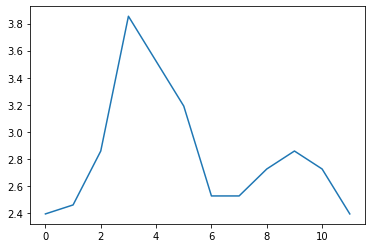

In [9]:
result = []
day = Day()
for i in range(12):
    day.date += datetime.timedelta(days=29)
    result.append(dogs[0].calculate_todays_hair_loss(day))
plt.plot(result)


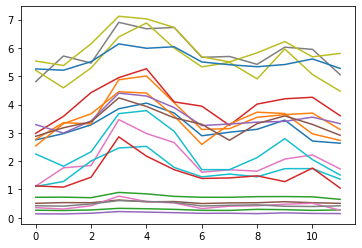

In [10]:
for dog in dogs:
    result = []
    day = Day()
    for i in range(12):
        day.date += datetime.timedelta(days=28)
        day.next_day()
        result.append(dog.calculate_todays_hair_loss(day))
    plt.plot(result)
    


In [11]:
result = []
day = Day()
while len(result) < 150_000:
    for dog in dogs:
        row = list(dog) + list(day) + [dog.calculate_todays_hair_loss(day)]
        result.append(row)
    day.next_day()
    

In [12]:
import sys
sys.getsizeof(result) / 1024 / 1024

1.2596588134765625

In [13]:
indexes = [
    'dog_id',
    'dog_height',
    'dog_weight',
    'dog_hair_dencity',
    'dog_hair_len',
    'month',
    'daily_stress',
    'daily_weather',
    'daily_horoscope',
    'hair_lost'
]
df = pd.DataFrame(result, columns=indexes)
df.shape

(150000, 10)

/home/bob/.local/share/virtualenvs/trumania-rmmd_nZJ/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.local/share/virtualenvs/trumania-rmmd_nZJ/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.local/share/virtualenvs/trumania-rmmd_nZJ/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum +

<AxesSubplot:xlabel='dog_weight', ylabel='hair_lost'>

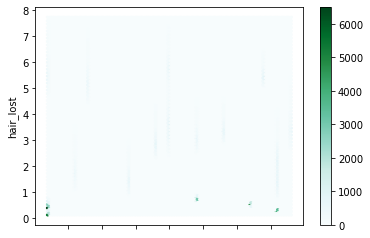

In [28]:
df.plot.hexbin('dog_weight', 'hair_lost')

In [14]:
df.to_csv('dataset.csv')